# Predictive Model for prediciting house prices

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn


In [2]:
pwd=os.getcwd()
filepath=os.path.join(pwd,"housing.csv")
filepath

'c:\\Users\\pc\\Desktop\\Data project\\housing.csv'

In [3]:
housing_data=pd.read_csv(filepath)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


## Data exploration and visualization


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='ocean_proximity'>

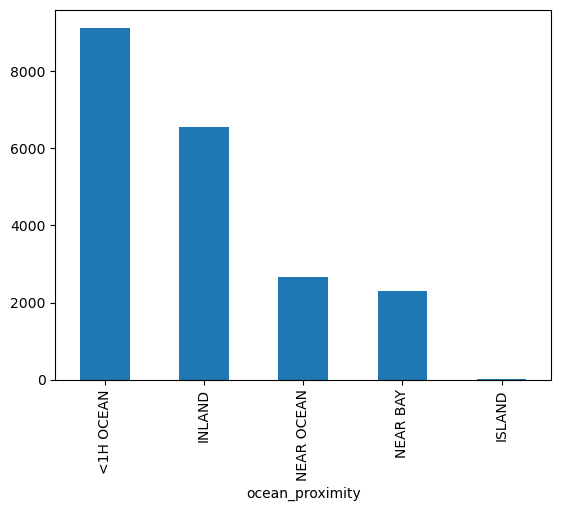

In [5]:
housing_data['ocean_proximity'].value_counts().plot(kind="bar")

In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

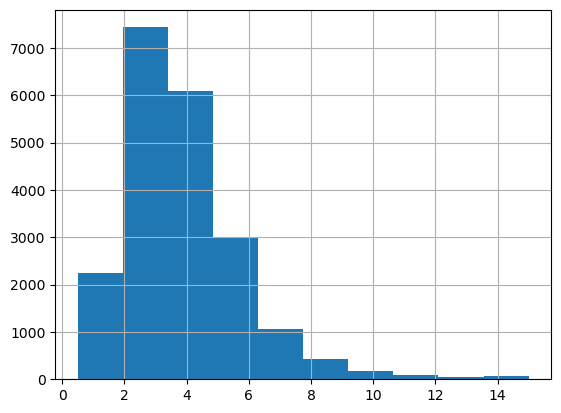

In [7]:
housing_data['median_income'].hist()

In [8]:
housing_data['income_cat']=pd.cut(housing_data['median_income'],
                                  bins=[0.,1.5,3.0,4.5,6.,np.inf],
                                  labels=[1,2,3,4,5])
housing_data['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

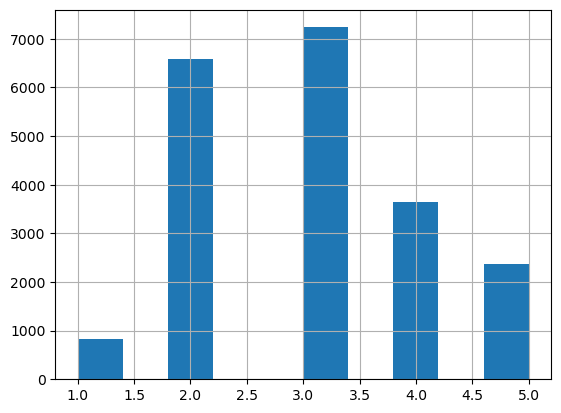

In [9]:
housing_data['income_cat'].hist()

In [10]:
y=housing_data["median_house_value"] # labels
X=housing_data.drop('median_house_value',axis=1)#to prop columns =>axis=1 for rows => axis=0
X #Features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,2
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,2
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,2
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,2


# Normal split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33) # 33 percent for test data

In [12]:
len(X_test)+len(X_train)

20640

<Axes: >

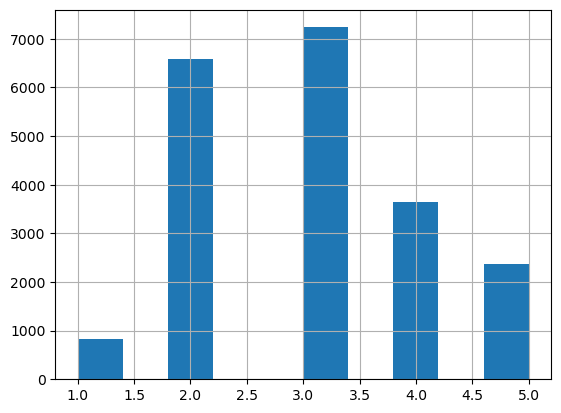

In [13]:
housing_data['income_cat'].hist()

<Axes: >

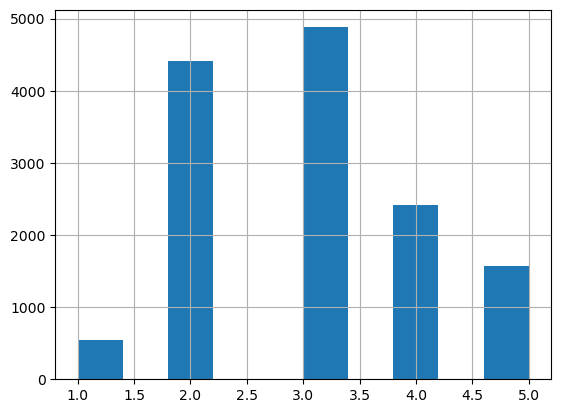

In [14]:
X_train['income_cat'].hist()

# Stratified Shuffle Split

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing_data,housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [16]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
housing_data['income_cat'].value_counts()/len(housing_data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [18]:
strat_train_set.drop("income_cat",axis="columns",inplace=True)
strat_test_set.drop("income_cat",axis="columns",inplace=True)

In [19]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52,3321,1115.0,1576,1034,2.0987,458300,NEAR BAY
14973,-118.38,34.14,40,1965,354.0,666,357,6.0876,483800,<1H OCEAN
3785,-121.98,38.36,33,1083,217.0,562,203,2.4330,101700,INLAND
14689,-117.11,33.75,17,4174,851.0,1845,780,2.2618,96100,INLAND
20507,-118.15,33.77,36,4366,1211.0,1912,1172,3.5292,361800,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41,2237,597.0,938,523,4.7105,500001,<1H OCEAN
13105,-119.31,36.32,23,2945,592.0,1419,532,2.5733,88800,INLAND
19301,-117.06,32.59,13,3920,775.0,2814,760,4.0616,148800,NEAR OCEAN
19121,-118.40,34.06,37,3781,873.0,1725,838,4.1455,500001,<1H OCEAN


# visualizing DATA

In [20]:
housing = strat_train_set.copy()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

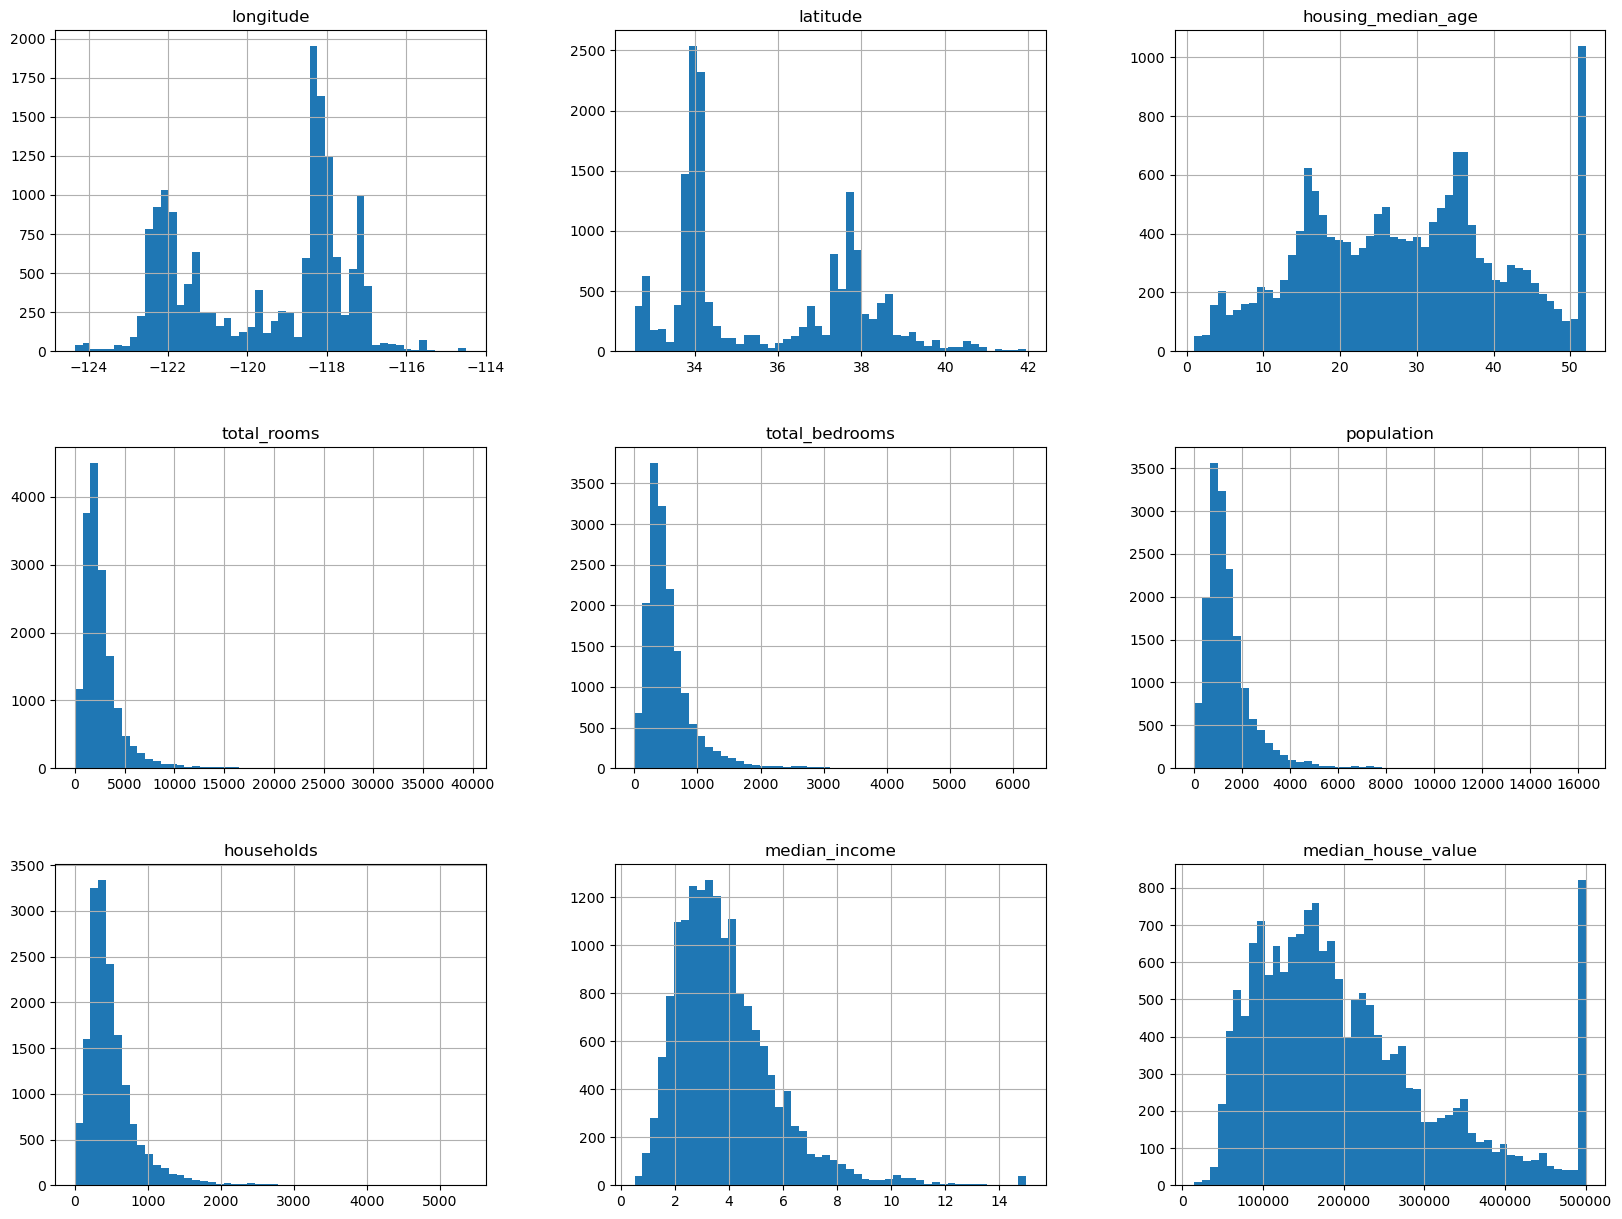

In [21]:
housing.hist(bins=50,figsize=(20,15))

###  geographical visualising

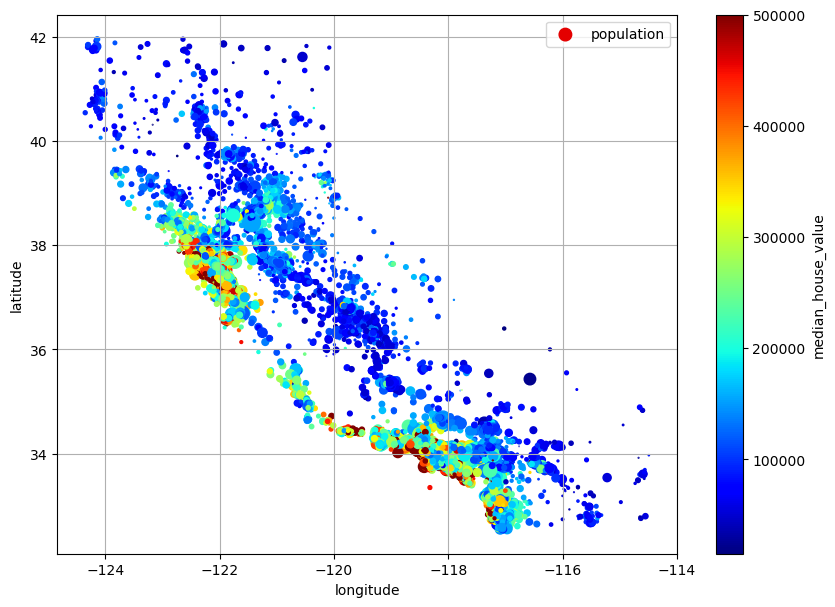

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"] / 100, label="population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))
plt.show()


## corelation matrices

In [23]:
import seaborn as sns
corr=housing.corr()

mask =np.triu(np.ones_like(corr,dtype=bool))
f, ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=3,center=0,square=True,linewidths=5,cbar_kws={"shrink": .5})

ValueError: could not convert string to float: 'NEAR BAY'

# preparing Data

### Data Pipline

In [ ]:
housing = strat_train_set.drop('median_house_value',axis=1)

lables=strat_train_set['median_house_value'].copy()

def feature_engineering(data):
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    data["bedrooms_ratio"] = data["total_bedrooms"] / data["total_rooms"]
    data["people_per_household"] = data["population"] / data["households"]
    return data

def data_transformation(data):
    ### Seperate lables if they exist 
    if 'median_house_value' in data.columns:
        lables=data['median_house_value']
        data=data.drop('median_house_value',axis=1) # axis=1 ==> columns
    else:
        lables=None
    ### Feature Engineering ###
    feature_engineered_data=feature_engineering(data)
    features=list(feature_engineered_data.columns)

    ###imputing Data###
    from sklearn.impute import SimpleImputer
    imputer=SimpleImputer(strategy='median')
    housing_num=feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ### 
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder=OneHotEncoder(sparse=False) # gives dense matrix 
    housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
    features=features+cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # we dont want this feature anymore as it is encoded

    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()

    housing_scaled=scaler.fit_transform(imputed)

    ### Concatening all Data ### 
    output = np.hstack([housing_scaled,housing_cat_1hot])
    return output ,lables ,features


## Select and train model

In [ ]:
train_data,train_lables,features=data_transformation(strat_train_set)
train_data

c:\Users\pc\miniconda3\envs\hands-on-machine-learning\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
test_data,test_lables,features=data_transformation(strat_test_set)
test_data

c:\Users\pc\miniconda3\envs\hands-on-machine-learning\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.18804209,  0.69962912, -0.62700415, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76723335, -0.8005624 ,  0.56519904, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68286868, -0.8704471 ,  0.08831777, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.71408066,  1.42642999,  0.32675841, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22774311,  0.92791914, -0.38856351, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.20890725, -1.33634509,  1.83688246, ...,  0.        ,
         0.        ,  1.        ]])

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_data,train_lables)

LinearRegression()

In [ ]:
original_values= test_lables[:5]

predicted_values=lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data={'original_values':original_values,"predicted_values":predicted_values})
comparison_dataframe["Differences"]=comparison_dataframe['original_values']-comparison_dataframe['predicted_values']

# comparison_dataframe
len(test_lables)

4128


### ( Mean square error )

In [ ]:
from sklearn.metrics import mean_squared_error

line_mse=mean_squared_error(original_values,predicted_values)
line_rmse=np.sqrt(line_mse)
line_rmse

46698.461585863326

## Desision Tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data,train_lables)    

DecisionTreeRegressor(random_state=42)


### ( Mean square error )

In [ ]:
train_prediction=tree_reg.predict(test_data)
tree_mse=mean_squared_error(test_lables,train_prediction)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

76214.25809366754

## Random Forest model


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(train_data,train_lables)

RandomForestRegressor(random_state=42)


### ( Mean square error )

In [ ]:
train_predictions=forest_reg.predict(test_data)
forest_mse=mean_squared_error(test_lables,train_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

59407.687727014716